In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ANN import FClayer
from ANN import ActivationLayer
from ANN import NetworkLayer

In [2]:
data1 =  pd.read_csv('iris.data', sep=",", header=None, names=["sl","sw","pl","pw","class"])
#print(data1)
data2 = pd.read_csv('bezdekIris.data', sep=',', header = None, names=["sl","sw","pl","pw","class"])
#print(data2) 

# %%
SL = data1["sl"].to_numpy(float)
SW = data1["sw"].to_numpy(float)
PL = data1["pl"].to_numpy(float)
PW = data1["pw"].to_numpy(float)
CL = data1["class"].to_numpy(str)
Y=[]
for i in CL:
    if i == 'Iris-setosa':
        Y.append([0,0,1])
    elif i == 'Iris-versicolor':
        Y.append([0,1,0])
    else:
        Y.append([1,0,0])
#print(Y)

In [3]:
Y = np.array(Y)
Ones = np.ones((150,))
datainput = np.dstack((Ones,SL,SW,PL,PW,Y[:,0],Y[:,1],Y[:,2]))[0]
#print(datainput)
dataframe = pd.DataFrame(datainput)
train_df = dataframe.sample(frac=0.7)
#print(train_df)
testing_dataframe = dataframe.copy(deep=True)
testing_dataframe = testing_dataframe.drop(train_df.index)
testing_data = testing_dataframe.drop(testing_dataframe.columns[[5,6,7]], axis = 1).to_numpy().reshape(45,1,5)
class_data = testing_dataframe.drop(testing_dataframe.columns[[0,1,2,3,4]], axis = 1).to_numpy().reshape(45,1,3)
#print(testing_data)

# %%
df_train = train_df.to_numpy()[:,0:5].reshape(105,1,5)
#print(df_train)
df_class = train_df.to_numpy()[:,5:].reshape(105,1,3)

In [4]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

def sigm(x):
    return 1/(1+np.exp(-x))
def sigm_prime(x):
    return (sigm(x)*(1-sigm(x)))

In [5]:
net = NetworkLayer()
net.layers.append(FClayer(5,4))
net.layers.append(ActivationLayer(sigm,sigm_prime))
net.layers.append(FClayer(4,3))
net.layers.append(ActivationLayer(sigm,sigm_prime))
net.loss = mse
net.loss_deriv = mse_prime
error_train = []
error_test = []
epochs = 3000
for i in range(epochs):
    error_train.append(net.train(df_train,df_class,epochs=1,learn_rate=0.02))
    out = net.testing(testing_data)
    error_test.append(mse(class_data,out))

for i in range(len(out)):
    print(out[i],class_data[i])

[[1.49594396e-04 2.48107481e-01 9.23781543e-01]] [[0. 0. 1.]]
[[1.41563608e-04 2.47283535e-01 9.27001521e-01]] [[0. 0. 1.]]
[[1.59235653e-04 2.49023969e-01 9.19847787e-01]] [[0. 0. 1.]]
[[1.36782265e-04 2.46816153e-01 9.29129750e-01]] [[0. 0. 1.]]
[[1.33696538e-04 2.46482053e-01 9.30417013e-01]] [[0. 0. 1.]]
[[1.42434914e-04 2.47390928e-01 9.26715820e-01]] [[0. 0. 1.]]
[[1.39567372e-04 2.47098735e-01 9.27915980e-01]] [[0. 0. 1.]]
[[1.44142395e-04 2.47546734e-01 9.25930956e-01]] [[0. 0. 1.]]
[[1.41898718e-04 2.47362264e-01 9.27059299e-01]] [[0. 0. 1.]]
[[1.53615367e-04 2.48518387e-01 9.22209971e-01]] [[0. 0. 1.]]
[[1.42013402e-04 2.47354466e-01 9.26914631e-01]] [[0. 0. 1.]]
[[1.41868232e-04 2.47340854e-01 9.26983274e-01]] [[0. 0. 1.]]
[[1.65151990e-04 2.49442994e-01 9.16980282e-01]] [[0. 0. 1.]]
[[0.05345    0.33916307 0.05133436]] [[0. 1. 0.]]
[[0.19560006 0.36395716 0.01410273]] [[0. 1. 0.]]
[[0.27385144 0.37157688 0.00950851]] [[0. 1. 0.]]
[[0.28603649 0.37261481 0.00899513]] [[0. 1.

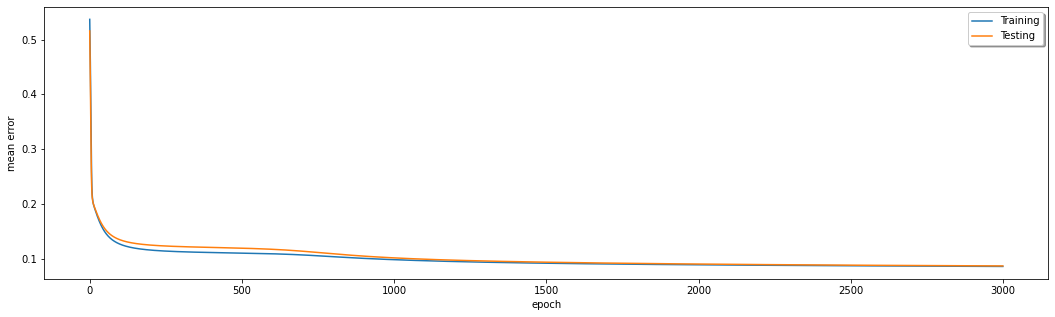

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)
tr_plot, = ax.plot(error_train)
te_plot, = ax.plot(error_test)
ax.set_xlabel('epoch')
ax.set_ylabel('mean error')
ax.legend((tr_plot, te_plot), ("Training", "Testing"), shadow=True)
plt.show()